# Predicting Heart Failure Disease


## I. Priprema i Vizualizacija Podataka



### 1. Prvi pogled na podatke

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 Učitavanje podataka i početni pregled

In [423]:
Data = pd.read_csv("heart_cleveland_upload.csv")

In [424]:
Data.shape

(297, 14)

In [425]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [426]:
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

### 1.2 Tipovi podataka 

In [427]:
Data.info()
#=> Nema null vrijednosti u podacima, svi tipovi su numerički.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### 1.3 Monotoni atributi 

In [428]:
Data.nunique()
#=> Nema monotonih atributa.

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

### 1.4 Nedostajući podaci

In [429]:
Data.isna().sum()
# => Nema nedostajućih podataka. :)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

### 1.5 Stršeći podaci

In [430]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [431]:
#=> Kod razina kolesterola - chol postoji sumnja za postojanje stršećih vrijednosti. 
#=> Primjećeno kod vizualizacije - graf ovisnosti razine kolesterola o godinama.

print('Chol > 100: ', (Data.chol > 100).sum())
print('Chol > 200: ', (Data.chol > 200).sum())
print('Chol > 300: ', (Data.chol > 300).sum())
print('Chol > 400: ', (Data.chol > 400).sum())
print('Chol > 500: ', (Data.chol > 500).sum())
print(Data[Data['chol'] > 390].chol.values)

print(Data[Data['chol'] > 390].condition.values)


#=> Ulazni primjer čija je razina kolesterola jednaka 564 je sigurno stršeći podatak budući da taj pacijent nije ni u tom slučaju 
# imao srčanih problema. Vizualizacijom i detaljnijim pregledom podataka uviđeno je da samo pet primjera ima razinu kolesterola 
# višu od 390. Međutim, oni nisu promijenjeni budući da među njima ima i oboljelih pacijenata što može ukazivati na 
# postajanje neke ovisnosti. Podatak gdje je chol=564 zamijenjen je srednjom vrijednošću.


Chol > 100:  297
Chol > 200:  248
Chol > 300:  44
Chol > 400:  4
Chol > 500:  1
[564 417 407 394 409]
[0 0 1 0 1]


In [432]:
Data.loc[Data.chol == 564, "chol"] = Data.chol.mean()

### 1.6. Nekonzistentni podatci

In [433]:
print(Data['sex'].value_counts())
print(Data['cp'].value_counts())
print(Data['fbs'].value_counts())
print(Data['restecg'].value_counts())
print(Data['exang'].value_counts())
print(Data['slope'].value_counts())
print(Data['ca'].value_counts())
print(Data['thal'].value_counts())
print(Data['condition'].value_counts())

#=> Svi atributi koji su ograničeni na određeni vrijednosti postižu samo te vrijednosti. Nema nekonzistentnosti među podacima.



1    201
0     96
Name: sex, dtype: int64
3    142
2     83
1     49
0     23
Name: cp, dtype: int64
0    254
1     43
Name: fbs, dtype: int64
0    147
2    146
1      4
Name: restecg, dtype: int64
0    200
1     97
Name: exang, dtype: int64
0    139
1    137
2     21
Name: slope, dtype: int64
0    174
1     65
2     38
3     20
Name: ca, dtype: int64
0    164
2    115
1     18
Name: thal, dtype: int64
0    160
1    137
Name: condition, dtype: int64


### 2. Vizualizacija podataka

### 2.1 Starost oboljelih i neoboljelih pacijenata

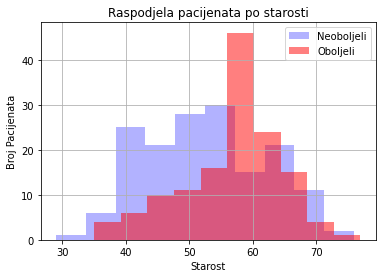

In [434]:
plt.hist(Data[Data.condition==0].age, label='Neoboljeli', color='blue', alpha = 0.3)
plt.hist(Data[Data.condition==1].age, label='Oboljeli', color='red', alpha = 0.5)
plt.xlabel('Starost')
plt.ylabel('Broj Pacijenata')
plt.title('Raspodjela pacijenata po starosti')
plt.grid()
plt.legend(loc='best')
plt.show()

In [435]:
# Najviše je oboljelih pacijenata u 60-im godinama.

### 2.2 Starost i spol oboljelih pacijenata

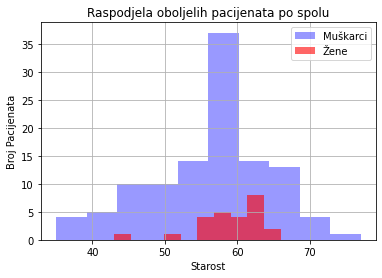

In [436]:
plt.hist(Data[(Data.condition==1) & (Data.sex==1)].age, label='Muškarci', color='blue', alpha = 0.4)
plt.hist(Data[(Data.condition==1) & (Data.sex==0)].age, label='Žene', color='red', alpha = 0.6)
plt.xlabel('Starost')
plt.ylabel('Broj Pacijenata')
plt.title('Raspodjela oboljelih pacijenata po spolu')
plt.grid()
plt.legend(loc='best')
plt.show()

In [437]:
# Sa sigurnošću se može reći kako muškarci u svakom životnom razdoblju čine većinu oboljelih.

### 2.3 Spol pacijenata

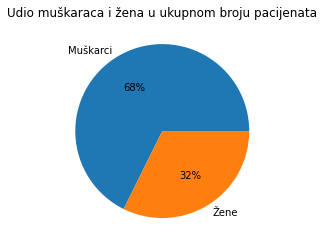

In [438]:
count_per_sex = Data['sex'].value_counts()
title_name = ['Muškarci', 'Žene']
plt.pie(count_per_sex, labels= title_name, autopct='%.f%%')
plt.title('Udio muškaraca i žena u ukupnom broju pacijenata')
plt.show()

### 2.4 Spol oboljelih pacijenata

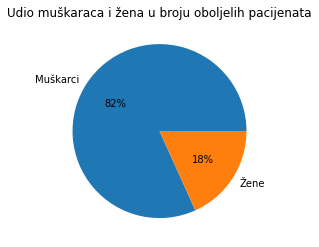

In [439]:
count_per_sex = Data[Data.condition == 1].sex.value_counts()
title_name = ['Muškarci', 'Žene']
plt.pie(count_per_sex, labels= title_name, autopct='%.f%%')
plt.title('Udio muškaraca i žena u broju oboljelih pacijenata')
plt.show()

### 2.5 Razina kolesterola u ovisnosti o godinama i spolu


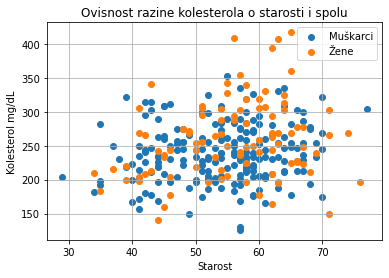

In [440]:
w_age = Data[Data['sex'] == 0].age.values
w_chol = Data[Data['sex'] == 0].chol.values
m_age = Data[Data['sex'] == 1].age.values
m_chol = Data[Data['sex'] == 1].chol.values

plt.scatter(m_age, m_chol, label = 'Muškarci')
plt.scatter(w_age, w_chol, label = 'Žene')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Starost')
plt.ylabel('Kolesterol mg/dL')
plt.title('Ovisnost razine kolesterola o starosti i spolu')
plt.show()

In [441]:
# Iz grafa se ništa ne može zaključiti sa sigurnošću, ali može se primijetiti da svim pacijentima sa godinama postepeno raste kolesterol.

### 2.6 Razina kolesterola kod oboljelih i neoboljelih

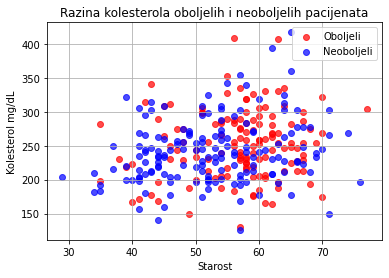

In [442]:
sick_age = Data[Data.condition == 1].age.values
healthy_age = Data[Data.condition == 0].age.values

sick_chol = Data[Data.condition == 1].chol.values
healthy_chol = Data[Data.condition == 0].chol.values

plt.scatter(sick_age, sick_chol, label = 'Oboljeli', color='red', alpha=0.7)
plt.scatter(healthy_age, healthy_chol, label = 'Neoboljeli', color='blue', alpha=0.7)
plt.grid()
plt.legend(loc='best')
plt.xlabel('Starost')
plt.ylabel('Kolesterol mg/dL')
plt.title('Razina kolesterola oboljelih i neoboljelih pacijenata')
plt.show()

In [443]:
# Kao i iz prethednog grafa ni iz ovog se ne mogu dobiti pretjerano korisne informacije. 
# Jedino se također primjećuje da i oboljelima i neoboljelima s vremenom raste kolesterol.

### 2.7 Ovisnost javljanja bolesti o boli u prsima 


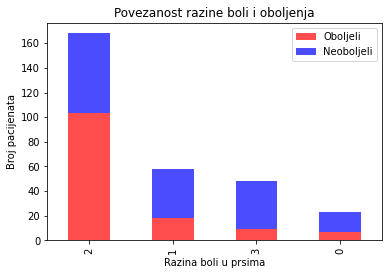

In [444]:

Data[Data.condition == 1].cp.value_counts()[:4].plot(kind='bar', color='red', alpha=0.7, label='Oboljeli')
Data[Data.condition == 0].cp.value_counts()[:4].plot(kind='bar', color='blue', alpha=0.7, bottom = Data[Data.condition == 1].cp.value_counts().values, label='Neoboljeli')
plt.xlabel('Razina boli u prsima')
plt.ylabel('Broj pacijenata')
plt.title('Povezanost razine boli i oboljenja')
plt.legend(loc='best')
plt.show()

In [ ]:
# Najviše je pacijenata opisano tipom boli 2. Među njima je bilo čak sto sa srčanim problemima! 
# Od ostalih tipova boli u prsima, oboljeli pacijenti činili su manji udio.

### 2.8. Povezanost razine kolesterola i oboljenja

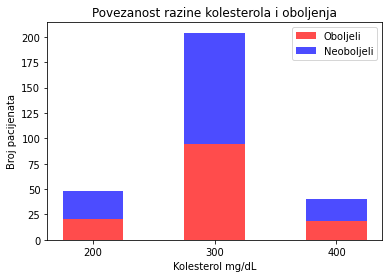

In [445]:
sick_x = ['200', '300', '400']
sick_y = []
healthy_y = []

sick_y.append(len(Data[(Data.condition==1) & (Data.chol<200)].values))
sick_y.append(len(Data[(Data.condition==1) & (Data.chol<300) & (Data.chol>200)].values))
sick_y.append(len(Data[(Data.condition==1) & (Data.chol<400) & (Data.chol>300)].values))

healthy_y.append(len(Data[(Data.condition==0) & (Data.chol<200)].values))
healthy_y.append(len(Data[(Data.condition==0) & (Data.chol<300) & (Data.chol>200)].values))
healthy_y.append(len(Data[(Data.condition==0) & (Data.chol<400) & (Data.chol>300)].values))

plt.bar(sick_x, sick_y, width=0.5, color='red', alpha=0.7, label='Oboljeli')
plt.bar(sick_x, healthy_y, width=0.5,color='blue', alpha=0.7, bottom = sick_y, label='Neoboljeli')
plt.xlabel('Kolesterol mg/dL')
plt.ylabel('Broj pacijenata')
plt.title('Povezanost razine kolesterola i oboljenja')
plt.legend(loc='best')
plt.show()

In [446]:
# Iz priloženog se vidi da je najviše pacijenata zatražilo pomoć sa razinom kolesterola u krvi 200-300 mg/dL. 
# Grubim pogledom na graf vidi se da razina kolesterola nije pouzdan pokazatelj oboljenja.